In [1]:
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit

# read in the data

df_GDP = pd.read_csv('./summary_GDP.csv', header=0) #change csv name
df_GTP = pd.read_csv('./summary_GTP.csv', header=0)

timepoints = df_GDP['Deut Time (sec)'].unique()
peptides_GDP = df_GDP['Sequence'].unique()
peptides_GTP = df_GTP['Sequence'].unique()

df_peptides_resnum = df_GDP[["Start","End","Sequence"]]
df_peptides_resnum = df_peptides_resnum.drop_duplicates()
peptide_resnums = {}
for index, row in df_peptides_resnum.iterrows():
    peptide_resnums[ row['Sequence'] ] = row['Start'], row['End']

peptides_both = set(peptides_GDP).intersection(peptides_GTP)
peptides_one = set(peptides_GDP).difference(peptides_GTP)

KLVL
GDP_exchanged_list
[0.0, 0.034, 0.040999999999999995, 0.040999999999999995, 0.031, 0.019, 0.024]
GTP_exchanged_list
[0.0, 0.038, 0.044000000000000004, 0.027999999999999997, 0.111, 0.078, 0.059000000000000004]
GDP
[0.01055555 0.01055555 0.01055555 0.96432051 0.96432048 0.96432053
 1.96833333]
perr[inf inf inf inf inf inf inf]

GTP
[1.61433519e-02 1.79701428e-02 4.52548761e-02 1.48900673e-01
 1.50448208e-01 6.46239646e-04 1.92059153e+00]
perr[inf inf inf inf inf inf inf]



/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


EKKYIAT
GDP_exchanged_list
[0.0, 2.424, 2.793, 3.0589999999999997, 2.84, 3.127, 3.235]
GTP_exchanged_list
[0.0, 2.886, 2.91, 2.737, 2.83, 2.923, 2.864]
GDP
[1.00413446 1.03145529 1.02966025 0.02222972 0.09349492 0.09291386
 1.93475   ]
perr[inf inf inf inf inf inf inf]

GTP
[0.95323037 0.95255409 0.95255407 0.98224455 0.80532737 0.80532751
 2.14166552]
perr[inf inf inf inf inf inf inf]



/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


VGDGGTGKTTFVKRHLTGEF
GDP_exchanged_list
[0.0, 2.248, 2.506, 2.853, 2.94, 3.147, 3.4130000000000003]
GTP_exchanged_list
[0.0, 2.484, 2.2569999999999997, 3.073, 2.8680000000000003, 2.891, 2.859]
GDP
[7.44169740e-01 1.02648609e+00 1.66333141e+00 2.53149316e-04
 2.76786058e-02 4.02650818e-01 1.45660128e+01]
perr[inf inf inf inf inf inf inf]



/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


GTP
[1.18476377e+00 6.46525446e-01 1.08978722e+00 3.40780254e-01
 4.08335755e-03 3.39296449e-01 1.50789133e+01]
perr[inf inf inf inf inf inf inf]

MEQATALPLPDEDDADL
GDP_exchanged_list
[0.0, 5.351, 6.147, 6.374, 6.21, 6.843, 6.904]
GTP_exchanged_list
[0.0, 6.148, 6.209, 5.523, 5.347, 5.617000000000001, 5.497000000000001]
GDP
[2.24950836 2.16719057 2.16605108 0.11818481 0.02771495 0.0757514
 8.41725   ]
perr[inf inf inf inf inf inf inf]

GTP
[1.90783286 1.90783281 1.90783286 0.98266939 0.99631182 0.99631182
 9.27650035]
perr[inf inf inf inf inf inf inf]



/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


RITYKNVPNWHRDLVRVCENIPIVL
GDP_exchanged_list
[0.0, 3.298, 6.712999999999999, 12.022, 7.975, 8.327]
GTP_exchanged_list
[0.0, 3.5989999999999998, 6.002000000000001, 6.841, nan]
GDP
[ 2.55566663  2.55566666  2.55566667  0.975583    0.99749993  0.99749993
 15.33300001]
perr[inf inf inf inf inf inf inf]



/Users/anumglasgow/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


ValueError: array must not contain infs or NaNs

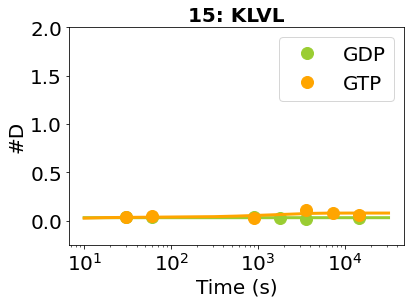

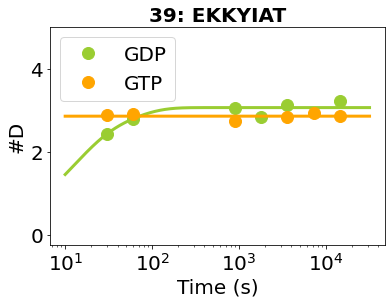

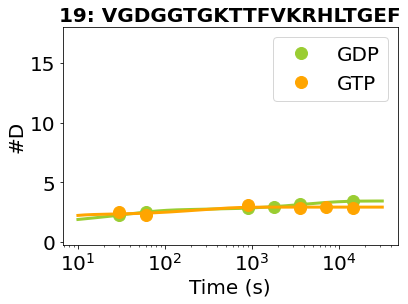

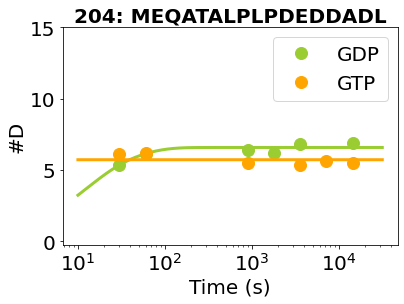

In [2]:
for peptide in peptides_both:
    GDP_exchanged = []
    GTP_exchanged = []
    max_protons = len(peptide)-2

    df_GDP_subset = df_GDP[["Sequence","Deut Time (sec)","#D"]]
    df_GTP_subset = df_GTP[["Sequence","Deut Time (sec)","#D"]]
    df_GDP_peptide = df_GDP_subset[df_GDP_subset["Sequence"] == peptide]
    df_GTP_peptide = df_GTP_subset[df_GTP_subset["Sequence"] == peptide]
        
    for timepoint in timepoints:
        df_GDP_tp = df_GDP_peptide[df_GDP_peptide["Deut Time (sec)"] == timepoint]
        GDP_exchanged.append(df_GDP_tp['#D'])
        df_GTP_tp = df_GTP_peptide[df_GTP_peptide["Deut Time (sec)"] == timepoint]
        GTP_exchanged.append(df_GTP_tp['#D'])
        
    GDP_timepoints = list(timepoints)
    index = 0
    GDP_exchanged = list(GDP_exchanged)
    for x in GDP_exchanged:
        if math.isnan(x):
            GDP_exchanged.pop(index)
            GDP_timepoints.pop(index)
        index = index + 1
        
    GTP_timepoints = list(timepoints)
    index = 0
    GTP_exchanged = list(GTP_exchanged)
    for y in GTP_exchanged:
        if math.isnan(y):
            GTP_exchanged.pop(index)
            GTP_timepoints.pop(index)
        index = index + 1
    
    def exchange_fit(x, a, b, c, d, e, f, g):
        return max_protons - a * np.exp(-d * x) - b * np.exp(-e * x) - c * np.exp(-f * x) - g

    if len(GDP_timepoints) > 4 and len(GTP_timepoints) > 4:

        GDP_exchanged_list = []
        for element in GDP_exchanged:
            GDP_exchanged_list.append(float(element))
        GTP_exchanged_list = []
        for element in GTP_exchanged:
            GTP_exchanged_list.append(float(element))
        
        print(peptide)
        print("GDP_exchanged_list")
        print(GDP_exchanged_list)
        print("GTP_exchanged_list")
        print(GTP_exchanged_list)

        trialT = np.logspace(1, 4.5, 10000)
        popt, pcov = curve_fit(f = exchange_fit, xdata = GDP_timepoints, ydata = GDP_exchanged_list, bounds = (0, [max_protons, max_protons, max_protons,1,1,1,max_protons]))
        exchange_GDP = exchange_fit(trialT, *popt)
        print("GDP")
        print(popt)
        perr = np.sqrt(np.diag(pcov))
        print("perr" + str(perr) + "\n")

        trialT = np.logspace(1, 4.5, 10000)
        popt, pcov = curve_fit(f = exchange_fit, xdata = GTP_timepoints, ydata = GTP_exchanged_list,
                               bounds = (0, [max_protons, max_protons, max_protons,1,1,1,max_protons]))
        exchange_GTP = exchange_fit(trialT, *popt)
        print("GTP")
        print(popt)
        perr = np.sqrt(np.diag(pcov))
        print("perr" + str(perr) + "\n")

        font = {'family' : 'DejaVu Sans',
                'weight' : 'normal',
                'size'   : 20
               }
        axes = {'titlesize' : 20,
                'titleweight' : 'bold',
                'labelsize' : 20
               }

        plt.rc('font', **font)
        plt.rc('axes', **axes)
        plt.rc('lines', lw = 3)

        fig, ax = plt.subplots()
        ax.plot(GDP_timepoints, GDP_exchanged, 'o', color = 'yellowgreen', markersize = 12, label = 'GDP')
        ax.plot(trialT, exchange_GDP, ls = '-', color = 'yellowgreen')
        ax.plot(GTP_timepoints, GTP_exchanged, 'o', markersize = 12, label = 'GTP', color = 'orange')
        ax.plot(trialT, exchange_GTP, ls = '-', color = 'orange')
        peptide_start = str(peptide_resnums.get(peptide)[0])
        ax.set(xlabel = 'Time (s)', ylabel = '#D', title = peptide_start + ": " + peptide)
        ax.set_ylim(-.25,len(peptide)-2)
        ax.set_xscale('log')
        ax.legend(frameon = True)
        plt.savefig(peptide + ".png",  transparent=True)

